In [2]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("nmplot.ipynb"))))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from TVA1_UU import TVA1_UU as BHDVCS
import plotly.graph_objects as go

dats = pd.read_csv('../dvcs_xs_May-2021_342_sets_with_trueCFFs.csv')
n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
F = np.array(dats['F'])
errF = np.array(dats['sigmaF'])
varF = np.array(dats['varF']) 
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])
trueReH = np.array(dats['ReH'])
trueReE = np.array(dats['ReE'])
trueReHT = np.array(dats['ReHTilde'])

def getSet(sets, setNum, itemsInSet=45):
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    return sets[a:b]

bhdvcs = BHDVCS()

In [75]:
del results

In [9]:
results = pd.read_csv('Results2.csv')

In [10]:
results = results.set_index(['set','replica'])

In [78]:
def getMeans(setNum):
    #replicas = results[results['set']==setNum]['replica'].unique()
    replicas = results.xs(setNum,level = "set").index.get_level_values("replica").unique()
    #epochs = results[results['set']==setNum]['epoch'].unique()
    epochs = results.xs(setNum,level = "set").index.get_level_values("epoch").unique()
    df = pd.DataFrame()
    for rep in replicas:
        for epoch in epochs:
            foo = results.loc[(setNum,rep,epoch)][['ReH','ReE','ReHT','error']]
            arr = pd.DataFrame(foo.mean().values.reshape((1,4)), columns = ['ReH','ReE','ReHT','error'])
            arr = arr.append(foo.std(), ignore_index=True)
            arr['replica'] = rep
            arr['epoch'] = epoch
            arr['type'] = ['mean','std']
            df = df.append(arr)
    return df

In [ ]:
means = getMeans(0)

In [13]:
def cffplot(setNum, repNums):
    fig = go.Figure()
    otherfig = go.Figure()
    for repNum in repNums:
        arr = results.loc[(setNum,repNum)]
        epochs = arr['epoch'].unique()
        firstpoints = arr[arr['rank']==3]
        std = np.array([])
        for epoch in epochs:
            std = np.append(std,arr[arr['epoch']==epoch][['ReH','ReE','ReHT']].std().values)
        std = np.reshape(std,(-1,3)).T
        otherfig.add_trace(go.Scatter(x=epochs, y=std[1], mode='lines', name = str(repNum)+"std"))
        fig.add_trace(go.Scatter(x=epochs, y=firstpoints['ReE'].values, mode='lines', name = str(repNum)))
    realReHT = getSet(trueReHT, setNum)[0]
    fig.add_trace(go.Scatter(x=epochs, y=[realReHT] * epochs.size, mode='lines', name = 'Real'))
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=True,width=800,height=800)
    otherfig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=True,width=800,height=800)
    otherfig.show()
    fig.show()

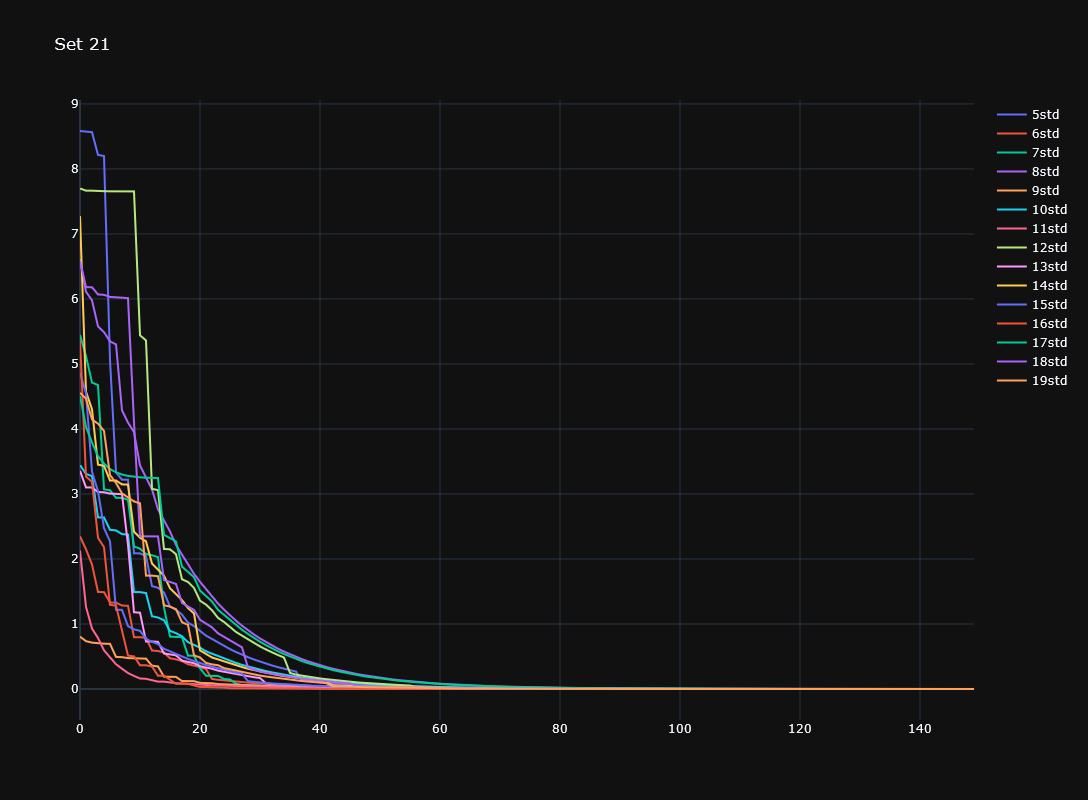

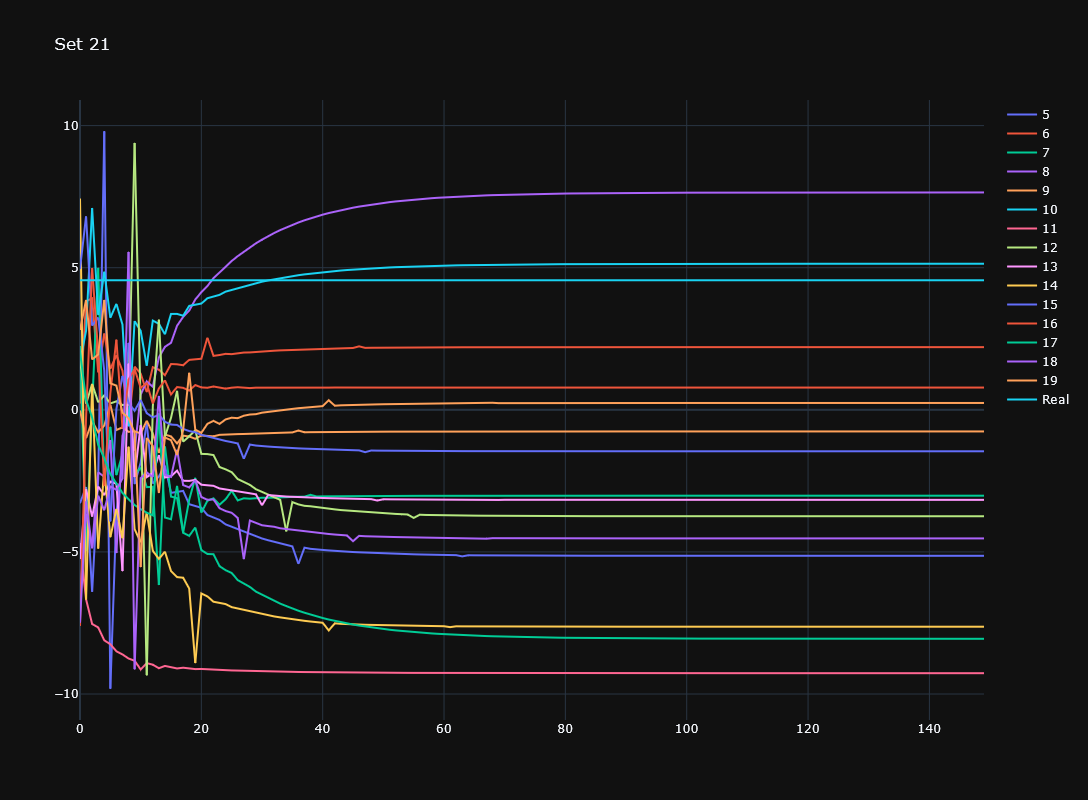

In [16]:
cffplot(20,[x+5 for x in range(15)])

In [64]:
np.reshape(np.append(np.array([1,1,1,1,2,1]),[3,4,1,4,5,6]),(-1,3)).T

array([[1, 1, 3, 4],
       [1, 2, 4, 5],
       [1, 1, 1, 6]])

In [37]:
results.loc[(0,1)].head()

Unnamed: 0  Unnamed: 0.1       ReH       ReE      ReHT  \
set replica                                                           
0   1              3200             0  8.744551  7.787686  8.138558   
    1              3201             1 -2.109356  1.614626 -7.505062   
    1              3202             2 -9.555593 -9.382424 -3.849915   
    1              3203             3  8.240262 -0.666440  4.824116   
    1              3204             0  8.744551  7.787686  8.138558   

                lastMove  epoch     error  rank  
set replica                                      
0   1                NaN      0  0.077620     2  
    1                NaN      0  0.042542     0  
    1                NaN      0  0.156149     3  
    1                NaN      0  0.052640     1  
    1        contraction      1  0.077620     3

In [91]:
np.std(np.array([[1,1,10,3],[2,2,2,2]]),axis=0)

array([0.5, 0.5, 4. , 0.5])

In [92]:
np.array([[1,1,10,3],[2,2,2,2]])[1]

array([2, 2, 2, 2])

In [6]:
np.max(np.array([[11,1,10,3],[2,2,2,2]])>np.array([[1,1,10,3],[2,2,2,2]]))

True